In [ ]:
# Importing the necessary libraries

import cv2 as cv  # OpenCV for image and video processing
import os  # Module for interacting with the operating system (e.g., file paths)
import numpy as np  # NumPy for numerical operations, especially on arrays
import tensorflow as tf  # TensorFlow for building and deploying machine learning models
import matplotlib.pyplot as plt  # Matplotlib for plotting and visualization

# Suppressing TensorFlow warning messages (to keep the console output cleaner)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'


In [ ]:
# Read the image from the specified file path using OpenCV
img = cv.imread("/content/PranavProfile.png")

# Note: OpenCV loads images in BGR (Blue, Green, Red) channel format by defau unilt,
# while Matplotlib (plt) expects images in RGB (Red, Green, Blue) channel format.
# If you want to display the image using plt, you will need to convert it from BGR to RGB.


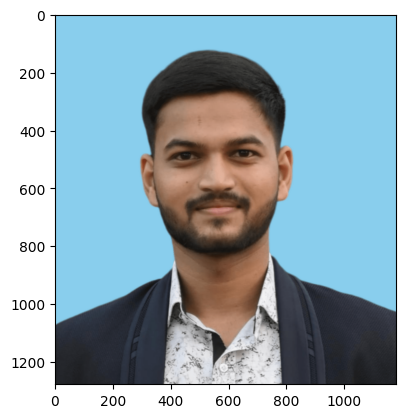

In [ ]:
# Convert the image from BGR (OpenCV format) to RGB format
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Display the image using Matplotlib in RGB format
plt.imshow(img)  # Matplotlib expects images in RGB format, so this will display the image correctly


In [ ]:
# Install the MTCNN library using pip.
# MTCNN (Multi-task Cascaded Convolutional Networks) is a popular method for detecting faces in images.
!pip install mtcnn


In [ ]:
# Import the MTCNN face detector from the mtcnn library
from mtcnn.mtcnn import MTCNN

# Create an instance of the MTCNN face detector
detector = MTCNN()

# Detect faces in the image using the MTCNN detector
# The 'detect_faces' method returns a list of dictionaries, each containing details about a detected face
results = detector.detect_faces(img)


In [ ]:
print(results)

"""
results = [
    {
        'box': [x, y, width, height],  # Coordinates and size of the bounding box around the face
        'confidence': confidence_score,  # Confidence score of the detected face (between 0 and 1)
        'keypoints': {
            'left_eye': (x1, y1),  # Coordinates of the left eye
            'right_eye': (x2, y2),  # Coordinates of the right eye
            'nose': (x3, y3),  # Coordinates of the nose
            'mouth_left': (x4, y4),  # Coordinates of the left corner of the mouth
            'mouth_right': (x5, y5)  # Coordinates of the right corner of the mouth
        }
    },
    # Additional face dictionaries if more faces are detected
]
"""

[{'box': [346, 272, 405, 528], 'confidence': 0.9999940395355225, 'keypoints': {'nose': [559, 584], 'mouth_right': [647, 667], 'right_eye': [649, 483], 'left_eye': [454, 492], 'mouth_left': [479, 675]}}]


"\nresults = [\n    {\n        'box': [x, y, width, height],  # Coordinates and size of the bounding box around the face\n        'confidence': confidence_score,  # Confidence score of the detected face (between 0 and 1)\n        'keypoints': {\n            'left_eye': (x1, y1),  # Coordinates of the left eye\n            'right_eye': (x2, y2),  # Coordinates of the right eye\n            'nose': (x3, y3),  # Coordinates of the nose\n            'mouth_left': (x4, y4),  # Coordinates of the left corner of the mouth\n            'mouth_right': (x5, y5)  # Coordinates of the right corner of the mouth\n        }\n    },\n    # Additional face dictionaries if more faces are detected\n]\n"

The results variable will contain a list of dictionaries, with each dictionary providing details about a detected face in the image.



In [ ]:
# Extract the bounding box coordinates from the first detected face
# 'x' and 'y' are the top-left corner coordinates of the bounding box
# 'w' (width) and 'h' (height) represent the dimensions of the bounding box
x, y, w, h = results[0]['box']

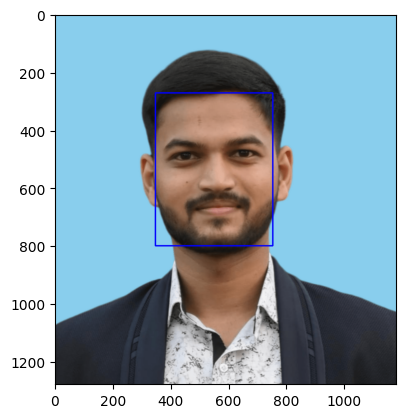

In [ ]:
# Draw a rectangle around the detected face on the image
# The rectangle's top-left corner is at (x, y) and the bottom-right corner is at (x + w, y + h)
# The color of the rectangle is red (BGR format: (0, 0, 255)) and the thickness is 3 pixels
img = cv.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 3)

# Display the image with the rectangle drawn around the detected face
plt.imshow(img)


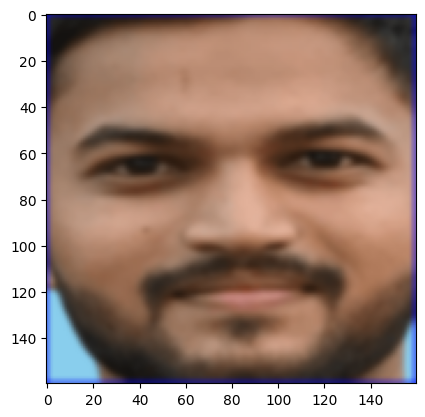

In [ ]:
# Import necessary functions from the scipy.signal module
from scipy.signal import convolve2d, fftconvolve
from scipy.signal import wiener

# Extract the face region from the image using the bounding box coordinates (y, y+h, x, x+w)
# 'my_face' now contains only the face region from the image
my_face = img[y:y+h, x:x+w]

# Resize the face region to 160x160 pixels as required by FaceNet input size
my_face = cv.resize(my_face, (160,160))

# Apply Gaussian blur to the face region to smooth out the image and reduce noise
# The kernel size is (5, 5) and the standard deviation is set to 0 (letting OpenCV calculate it automatically)
blurred_face = cv.GaussianBlur(my_face, (5, 5), 0)

# Resize the blurred face image to 160x160 pixels (though it's already 160x160, this step ensures consistency)
face_arr = cv.resize(blurred_face, (160,160))

# Display the blurred and resized face using Matplotlib
plt.imshow(face_arr)


array([[[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [ 45,  45,  44],
        [ 41,  41,  40],
        ...,
        [ 53,  53,  51],
        [ 51,  51,  49],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [ 39,  39,  38],
        [ 38,  38,  37],
        ...,
        [ 47,  46,  45],
        [ 43,  43,  42],
        [  0,   0, 255]],

       ...,

       [[  0,   0, 255],
        [137, 206, 237],
        [137, 206, 237],
        ...,
        [137, 206, 237],
        [137, 206, 237],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [137, 206, 237],
        [137, 206, 237],
        ...,
        [137, 206, 237],
        [137, 206, 237],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [ 21,  31, 252],
        [ 21,  31, 252],
        ...,
        [ 21,  31, 252],
        [ 21,  31, 252],
        [  0,   0, 255]]], dtype=uint8)
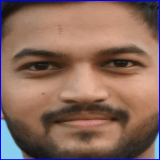

In [ ]:
my_face
#contains the cropped region of the original image that corresponds to the detected face.

In [ ]:
# Define a class for loading and preprocessing face data
class FACELOADING:
    def __init__(self, directory):
        """
        Initialize the FACELOADING class.

        :param directory: The directory containing subdirectories of face images.
        """
        self.directory = directory  # Main directory containing subdirectories of images
        self.target_size = (160, 160)  # Target size for resizing faces
        self.X = []  # List to hold face images
        self.Y = []  # List to hold labels for each face image
        self.detector = MTCNN()  # Initialize the MTCNN face detector

    def extract_face(self, filename):
        """
        Extract and preprocess the face from an image file.

        :param filename: The path to the image file.
        :return: The cropped and resized face image.
        """
        img = cv.imread(filename)  # Read the image from file
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)  # Convert image from BGR to RGB format

        # Detect faces in the image and extract the bounding box of the first detected face
        x, y, w, h = self.detector.detect_faces(img)[0]['box']
        x, y = abs(x), abs(y)  # Ensure coordinates are positive
        face = img[y:y + h, x:x + w]  # Crop the face from the image
        face_arr = cv.resize(face, self.target_size)  # Resize the face to the target size
        return face_arr

    def load_faces(self, dir):
        """
        Load faces from a given directory.

        :param dir: The directory containing images of faces.
        :return: A list of face images.
        """
        FACES = []  # List to hold faces from the directory
        for im_name in os.listdir(dir):  # Iterate over all image files in the directory
            try:
                path = os.path.join(dir, im_name)  # Full path to the image file
                single_face = self.extract_face(path)  # Extract face from the image
                FACES.append(single_face)  # Add the face to the list
            except Exception as e:
                pass  # If an error occurs (e.g., no face detected), skip the image
        return FACES

    def load_classes(self):
        """
        Load faces and their corresponding labels from the main directory.

        :return: A tuple of NumPy arrays: (faces, labels)
        """
        for sub_dir in os.listdir(self.directory):  # Iterate over each subdirectory (each representing a class)
            path = os.path.join(self.directory, sub_dir)  # Full path to the subdirectory
            FACES = self.load_faces(path)  # Load faces from the subdirectory
            labels = [sub_dir for _ in range(len(FACES))]  # Create labels for the faces (one label per face)
            print(f"Loaded successfully: {len(labels)}")  # Print the number of faces loaded
            self.X.extend(FACES)  # Add faces to the list of all faces
            self.Y.extend(labels)  # Add labels to the list of all labels

        # Convert lists to NumPy arrays
        return np.asarray(self.X), np.asarray(self.Y)

    def plot_images(self):
        """
        Plot a grid of face images.
        """
        plt.figure(figsize=(18, 16))  # Create a figure with a specific size
        for num, image in enumerate(self.X):  # Iterate over all face images
            ncols = 3  # Number of columns in the grid
            nrows = len(self.Y) // ncols + 1  # Number of rows in the grid
            plt.subplot(nrows, ncols, num + 1)  # Create a subplot for each image
            plt.imshow(image)  # Display the image
            plt.axis('off')  # Hide the axes

print("Class 'FACELOADING' loaded For Further use..!")  # Print message indicating class is ready for use


Class 'FACELOADING' loaded For Further use..!


In [ ]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:
# Create an instance of the FACELOADING class
# Provide the path to the directory containing subdirectories of face images
# Each subdirectory represents a different class (e.g., different people)
faceloading = FACELOADING("/content/drive/MyDrive/Images-Original")
# faceloading = FACELOADING("/content/drive/MyDrive/Original Images")
# FACELOADING("/content/drive/MyDrive/lfw-deepfunneled")

# Load the face images and their corresponding labels
# The 'load_classes' method processes all images in the specified directory
# and returns two NumPy arrays: X (face images) and Y (labels)
X, Y = faceloading.load_classes()


Loaded successfully: 91
Loaded successfully: 49
Loaded successfully: 115
Loaded successfully: 58
Loaded successfully: 1
Loaded successfully: 2
Loaded successfully: 1
Loaded successfully: 1
Loaded successfully: 77
Loaded successfully: 112
Loaded successfully: 102
Loaded successfully: 105
Loaded successfully: 109
Loaded successfully: 75
Loaded successfully: 71
Loaded successfully: 61
Loaded successfully: 121
Loaded successfully: 80
Loaded successfully: 96
Loaded successfully: 78
Loaded successfully: 87
Loaded successfully: 120
Loaded successfully: 97
Loaded successfully: 77
Loaded successfully: 1
Loaded successfully: 1
Loaded successfully: 1
Loaded successfully: 4
Loaded successfully: 1
Loaded successfully: 1
Loaded successfully: 1


In [ ]:
# Install the keras-facenet library. This library provides a pre-trained FaceNet model for face recognition.
!pip install keras-facenet

In [ ]:
# Import the FaceNet class from the keras_facenet library
from keras_facenet import FaceNet

# Create an instance of the FaceNet model, loading the pre-trained weights
embedder = FaceNet()

# Define a function to get the embedding of a face image
def get_embedding(face_img):
    """
    This function takes a face image as input and returns its 512-dimensional embedding vector.
    Args:
        face_img: The face image as a NumPy array.
    Returns:
        The 512-dimensional embedding vector of the face image.
    """
    # Convert the image to float32 data type. This is often required for deep learning models.
    face_img = face_img.astype('float32')  # 3D (160x160x3) - Represents the image dimensions (height, width, channels)

    # Add an extra dimension to the image to represent the batch size.
    # FaceNet expects input in the format (batch_size, height, width, channels).
    face_img = np.expand_dims(face_img, axis=0)
    # 4D (Nonex160x160x3) - 'None' represents a variable batch size

    # Get the embedding of the face image using the FaceNet model.
    # The 'embeddings' method of the FaceNet object extracts the embedding vector.
    yhat = embedder.embeddings(face_img)

    # Return the embedding vector for the first (and only) image in the batch.
    # The embedding is a 512-dimensional vector representing the face's features.
    return yhat[0]  # 512D image (1x1x512) - Represents the embedding vector dimensions

In [ ]:
# Initialize an empty list to store the face embeddings
EMBEDDED_X = []

# Iterate through each image in the 'X' dataset (which presumably contains face images)
for img in X:
    # Call the 'get_embedding' function to extract the embedding for the current image
    # and append it to the 'EMBEDDED_X' list
    EMBEDDED_X.append(get_embedding(img))

# Convert the 'EMBEDDED_X' list into a NumPy array for efficient processing
# This creates a 2D array where each row represents an embedding vector
EMBEDDED_X = np.asarray(EMBEDDED_X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [ ]:
# Save the face embeddings and their corresponding labels to a compressed NumPy archive file.
# 'faces_embeddings_done_4classes.npz' is the name of the file.
# EMBEDDED_X contains the face embeddings (presumably a NumPy array).
# Y contains the labels corresponding to each face embedding (also likely a NumPy array).
# np.savez_compressed is used to create a compressed .npz file, which is a standard format for saving NumPy arrays.

np.savez_compressed('faces_embeddings_done_4classes.npz', EMBEDDED_X, Y)

In [ ]:
# Import the LabelEncoder class from scikit-learn
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
encoder = LabelEncoder()

# Fit the encoder to the labels (Y) to learn the unique classes
encoder.fit(Y)

# Transform the labels (Y) into numerical representations
Y = encoder.transform(Y)

Text(0, 0.5, '30')

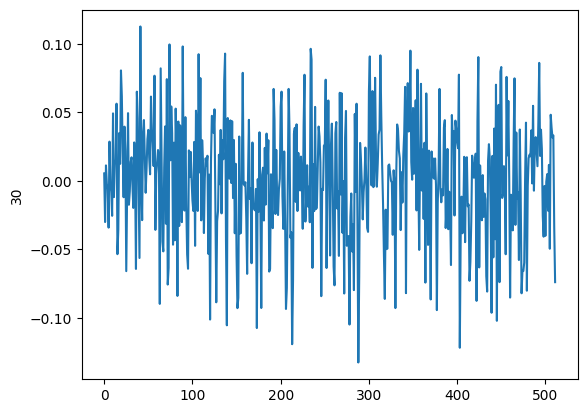

In [ ]:
# Plot the values of the first face embedding (EMBEDDED_X[0])
plt.plot(EMBEDDED_X[0])

# Set the y-axis label to the corresponding label of the first face embedding (Y[0])
plt.ylabel(Y[0])

In [ ]:
Y

array([30, 30, 30, ...,  2,  1,  0])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Create KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=3)

# Add noise to features
noise_factor = 0.13  # Adjust to control noise level
EMBEDDED_X_noisy = EMBEDDED_X + noise_factor * np.random.randn(*EMBEDDED_X.shape)

# Lists to store scores
train_scores = []
validation_scores = []
test_scores = []

for i in range(1000):
    # Split data with reduced training size
    X_train, X_temp, y_train, y_temp = train_test_split(
        EMBEDDED_X_noisy, Y, test_size=0.4, random_state=i  # Increased test_size
    )
    X_validation, X_test, y_validation, y_test = train_test_split(
        X_temp, y_temp, test_size=0.5, random_state=i
    )

    # Train KNN model
    knn_model = KNeighborsClassifier(n_neighbors=3)
    knn_model.fit(X_train, y_train)

    # Predictions and accuracy calculations
    ypreds_train = knn_model.predict(X_train)
    ypreds_validation = knn_model.predict(X_validation)
    ypreds_test = knn_model.predict(X_test)

    accuracy_train = accuracy_score(y_train, ypreds_train)
    accuracy_validation = accuracy_score(y_validation, ypreds_validation)
    accuracy_test = accuracy_score(y_test, ypreds_test)

    # Append scores to lists
    train_scores.append(accuracy_train)
    validation_scores.append(accuracy_validation)
    test_scores.append(accuracy_test)


In [ ]:
# Print average scores
print(f"Average accuracy on training set: {np.mean(train_scores)}")
print(f"Average accuracy on validation set: {np.mean(validation_scores)}")
print(f"Average accuracy on test set: {np.mean(test_scores)}")

Average accuracy on training set: 0.884050139275766
Average accuracy on validation set: 0.7209777158774373
Average accuracy on test set: 0.7194277777777777


Average accuracy for every 100 iterations:
Iteration 1:
    Training set: 0.8841411327762303
    Validation set: 0.72
    Test set: 0.7172777777777778
Iteration 2:
    Training set: 0.8840389972144849
    Validation set: 0.7213091922005571
    Test set: 0.7170555555555558
Iteration 3:
    Training set: 0.8835933147632312
    Validation set: 0.7182451253481894
    Test set: 0.7195277777777777
Iteration 4:
    Training set: 0.884150417827298
    Validation set: 0.7232033426183843
    Test set: 0.719361111111111
Iteration 5:
    Training set: 0.8845218198700092
    Validation set: 0.7196657381615599
    Test set: 0.7163611111111112
Iteration 6:
    Training set: 0.8852089136490251
    Validation set: 0.7205292479108636
    Test set: 0.7191111111111113
Iteration 7:
    Training set: 0.8835654596100277
    Validation set: 0.7211420612813372
    Test set: 0.7209444444444444
Iteration 8:
    Training set: 0.884029712163417
    Validation set: 0.7245682451253481
    Test set: 0.721000000000000

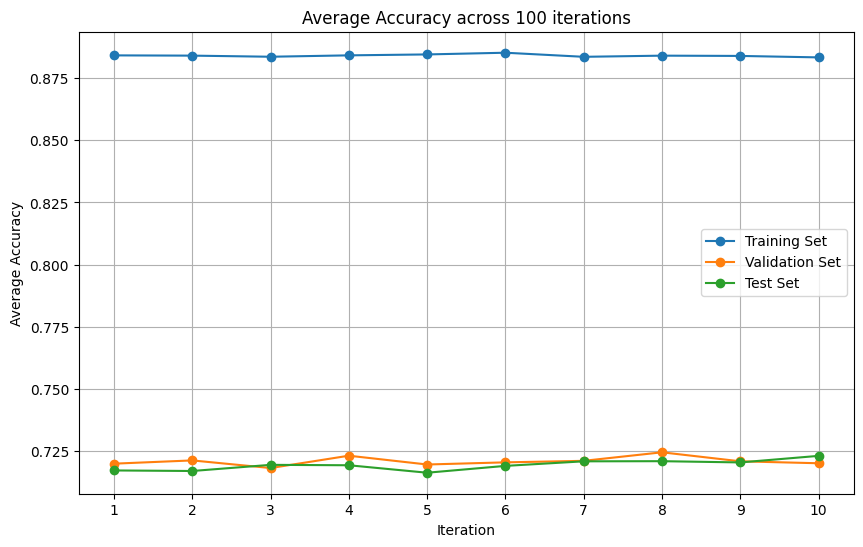

In [ ]:
# Find average accuracy for every 100 values
train_avg = [np.mean(train_scores[i:i+100]) for i in range(0, len(train_scores), 100)]
validation_avg = [np.mean(validation_scores[i:i+100]) for i in range(0, len(validation_scores), 100)]
test_avg = [np.mean(test_scores[i:i+100]) for i in range(0, len(test_scores), 100)]

# Print average accuracy for every 100 iterations
print("Average accuracy for every 100 iterations:")
for i in range(10):
    print(f"Iteration {i+1}:")
    print(f"    Training set: {train_avg[i]}")
    print(f"    Validation set: {validation_avg[i]}")
    print(f"    Test set: {test_avg[i]}")

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), train_avg, label='Training Set', marker='o')
plt.plot(range(1, 11), validation_avg, label='Validation Set', marker='o')
plt.plot(range(1, 11), test_avg, label='Test Set', marker='o')
plt.title('Average Accuracy across 100 iterations')
plt.xlabel('Iteration')
plt.ylabel('Average Accuracy')
plt.xticks(range(1, 11))
plt.legend()
plt.grid(True)
plt.show()


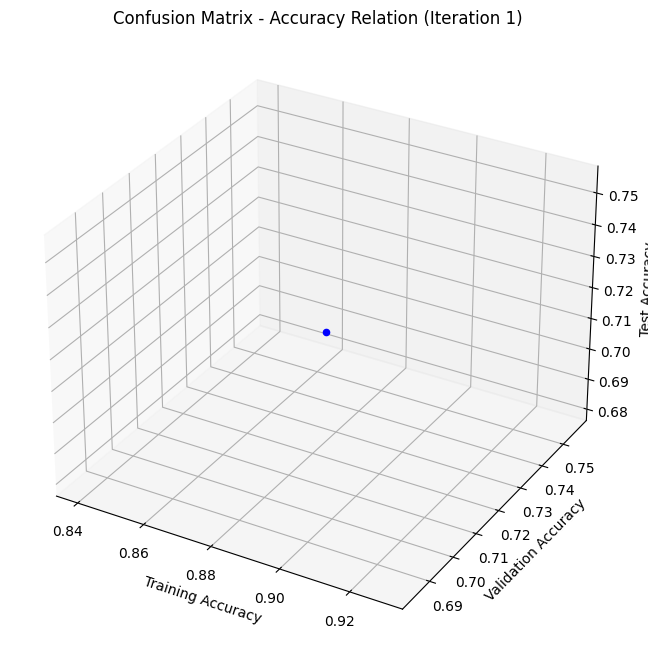

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Select the first element from each list for Iteration 1
avg_train_accuracy = train_avg[0]  # Average training accuracy for Iteration 1
avg_validation_accuracy = validation_avg[0]  # Average validation accuracy for Iteration 1
avg_test_accuracy = test_avg[0]  # Average test accuracy for Iteration 1


# Plot the single point
ax.scatter(avg_train_accuracy, avg_validation_accuracy, avg_test_accuracy, c='b', marker='o')

# Define the axes labels
ax.set_xlabel('Training Accuracy')
ax.set_ylabel('Validation Accuracy')
ax.set_zlabel('Test Accuracy')

plt.title('Confusion Matrix - Accuracy Relation (Iteration 1)')
plt.show()

In [ ]:
import pickle
#save the model
with open('knn_model_160x160.pkl','wb') as f:
    pickle.dump(knn_model,f)

In [ ]:
print("End Of Program")

End Of Program
